In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
for dirname, _, filenames in os.walk('Handwritten-Devanagari-Characters-Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Handwritten-Devanagari-Characters-Dataset\data\consonants\c_1\001_01.jpg
Handwritten-Devanagari-Characters-Dataset\data\consonants\c_1\001_02.jpg
Handwritten-Devanagari-Characters-Dataset\data\consonants\c_1\001_03.jpg
Handwritten-Devanagari-Characters-Dataset\data\consonants\c_1\001_04.jpg
Handwritten-Devanagari-Characters-Dataset\data\consonants\c_1\001_05.jpg
Handwritten-Devanagari-Characters-Dataset\data\consonants\c_1\001_06.jpg
Handwritten-Devanagari-Characters-Dataset\data\consonants\c_1\001_07.jpg
Handwritten-Devanagari-Characters-Dataset\data\consonants\c_1\001_08.jpg
Handwritten-Devanagari-Characters-Dataset\data\consonants\c_1\001_09.jpg
Handwritten-Devanagari-Characters-Dataset\data\consonants\c_1\001_10.jpg
Handwritten-Devanagari-Characters-Dataset\data\consonants\c_1\001_11.jpg
Handwritten-Devanagari-Characters-Dataset\data\consonants\c_1\001_12.jpg
Handwritten-Devanagari-Characters-Dataset\data\consonants\c_1\001_13.jpg
Handwritten-Devanagari-Characters-Dataset\data\cons

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [3]:
data_path = 'Handwritten-Devanagari-Characters-Dataset/data/numerals'

In [4]:
character_folders = sorted(os.listdir(data_path))

label_mapping = {folder: idx for idx, folder in enumerate(character_folders)}
print("Label mapping:", label_mapping)

image_data = []
image_labels = []

for label_name, label_idx in label_mapping.items():
    folder_path = os.path.join(data_path, label_name)
    image_files = sorted(os.listdir(folder_path))[:200]
    
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (32, 32))
        image_data.append(img.flatten())
        image_labels.append(label_idx)

image_data = np.array(image_data)
image_labels = np.array(image_labels)

df = pd.DataFrame(image_data)
df['label'] = image_labels  

print("DataFrame shape:", df.shape)  
print(df.head())

Label mapping: {'n_0': 0, 'n_1': 1, 'n_2': 2, 'n_3': 3, 'n_4': 4, 'n_5': 5, 'n_6': 6, 'n_7': 7, 'n_8': 8, 'n_9': 9}
DataFrame shape: (2000, 1025)
     0    1    2    3    4    5    6    7    8    9  ...  1015  1016  1017  \
0  253  250  250  253  255  253  249  251  246  243  ...   249   254   255   
1  253  254  253  246  247  255  253  247  251  254  ...   248   241   252   
2  254  248  252  251  251  251  245  253  253  254  ...   252   255   255   
3  255  234  247  255  248  244  254  255  255  255  ...   246   254   255   
4  255  250  250  253  254  253  252  255  255  251  ...   251   255   255   

   1018  1019  1020  1021  1022  1023  label  
0   252   253   254   254   254   254      0  
1   255   255   255   255   255   255      0  
2   255   255   255   255   255   255      0  
3   252   253   255   255   255   255      0  
4   248   249   253   254   254   254      0  

[5 rows x 1025 columns]


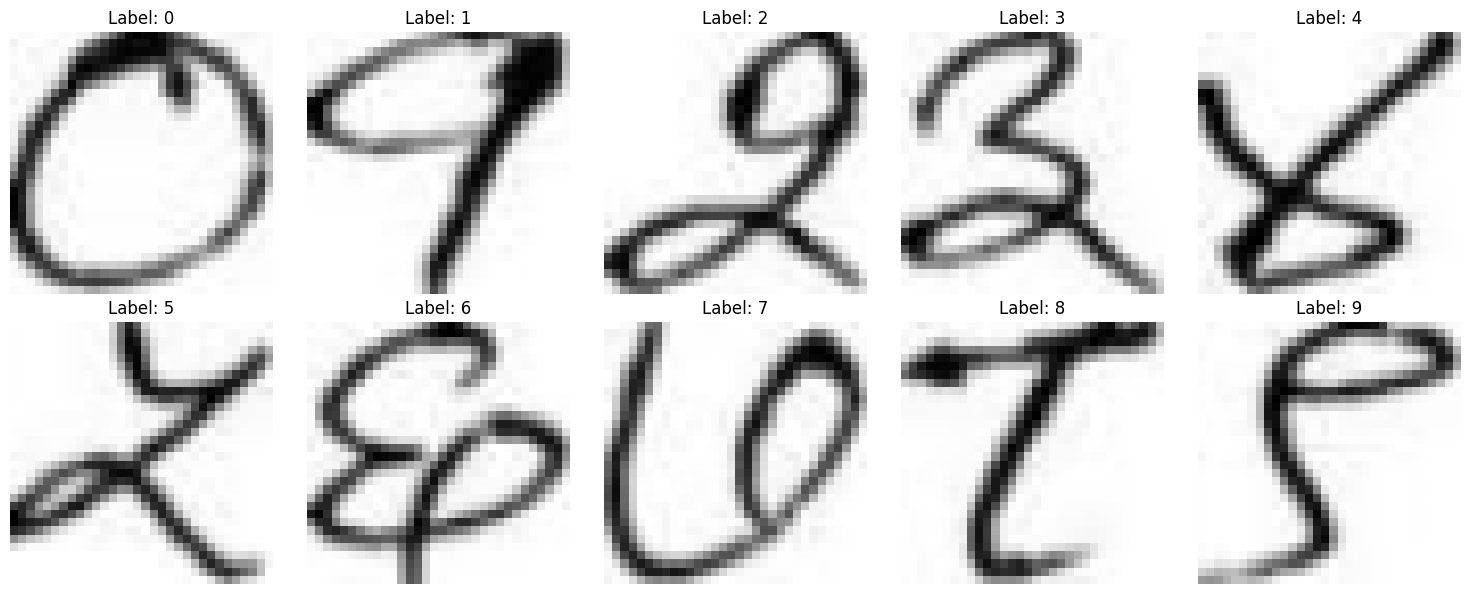

In [5]:
rows = 2
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
axes = axes.flatten()  

for idx, (label, group) in enumerate(df.groupby('label')):
    img_data = group.iloc[0, :-1] 
    img = img_data.values.reshape(32, 32)  
    axes[idx].imshow(img, cmap='gray')  
    axes[idx].set_title(f'Label: {label}')  
    axes[idx].axis('off') 

plt.tight_layout()
plt.show()

In [6]:
X = np.array(image_data).astype('float32') / 255.0  
y = np.array(image_labels)

X = X.reshape(-1, 32, 32, 1)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
gpus = tf.config.list_physical_devices('GPU')
print("Available GPUs:", gpus)

if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Available GPUs: []
Epoch 1/10


C:\Users\HP\anaconda3\envs\abhijitg_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.1476 - loss: 2.2596 - val_accuracy: 0.4844 - val_loss: 1.6207
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6374 - loss: 1.2299 - val_accuracy: 0.7531 - val_loss: 0.7331
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8177 - loss: 0.5649 - val_accuracy: 0.8687 - val_loss: 0.3892
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8836 - loss: 0.3457 - val_accuracy: 0.9094 - val_loss: 0.2608
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9333 - loss: 0.2202 - val_accuracy: 0.9344 - val_loss: 0.2070
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9620 - loss: 0.1408 - val_accuracy: 0.9594 - val_loss: 0.1317
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9766 - loss: 0.0967 - val_accuracy: 0.9719 - val_loss: 0.0859
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9858 - loss: 0.0654 - val_accuracy: 0.9563 - val_loss: 0.1

In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9523 - loss: 0.1501
Test accuracy: 0.9475


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


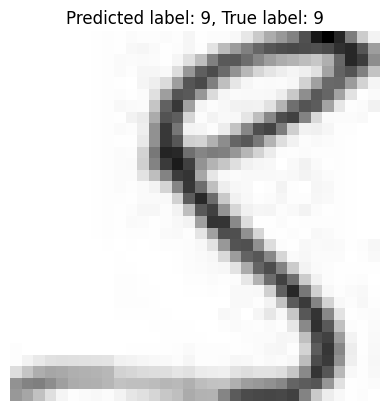

In [9]:
predictions = model.predict(X_test)



plt.imshow(X_test[0].reshape(32, 32), cmap='gray')
plt.title(f'Predicted label: {np.argmax(predictions[0])}, True label: {y_test[0]}')
plt.axis('off')
plt.show()

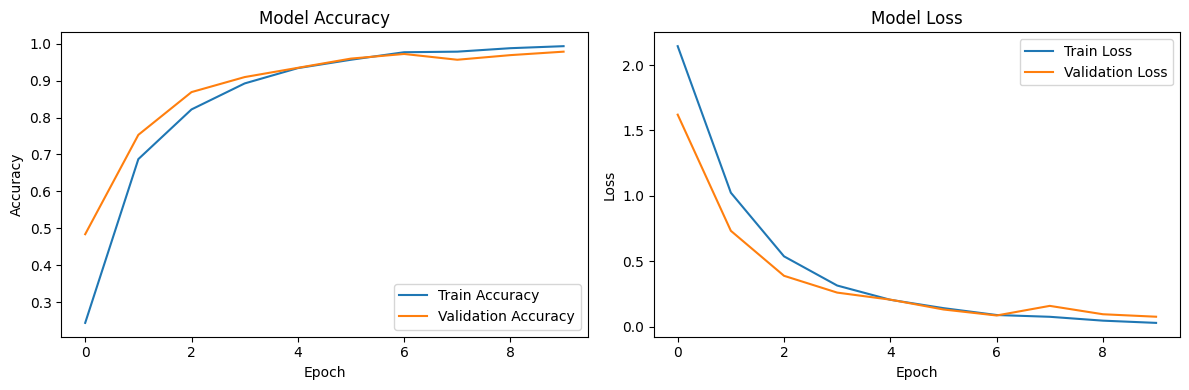

In [10]:
plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

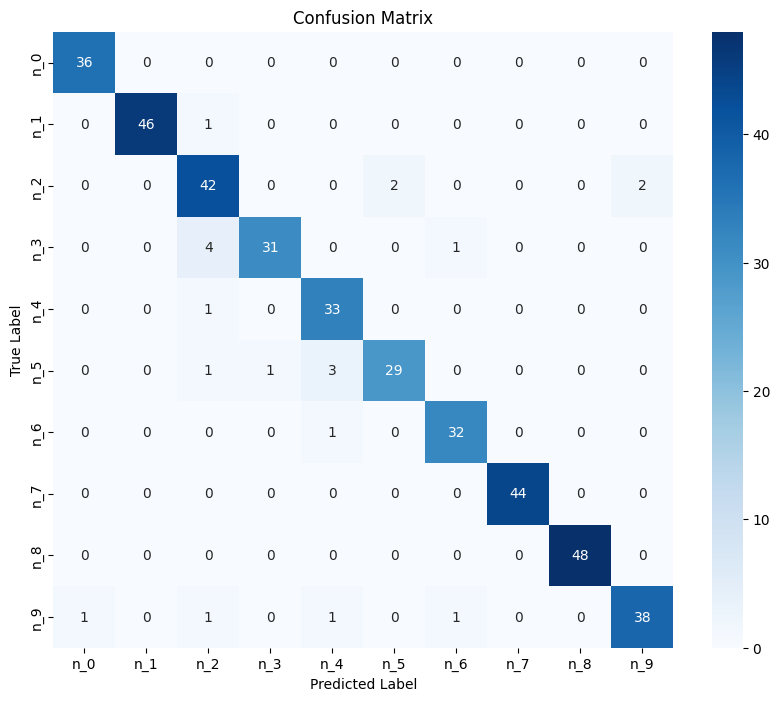

Classification Report:
              precision    recall  f1-score   support

         n_0       0.97      1.00      0.99        36
         n_1       1.00      0.98      0.99        47
         n_2       0.84      0.91      0.88        46
         n_3       0.97      0.86      0.91        36
         n_4       0.87      0.97      0.92        34
         n_5       0.94      0.85      0.89        34
         n_6       0.94      0.97      0.96        33
         n_7       1.00      1.00      1.00        44
         n_8       1.00      1.00      1.00        48
         n_9       0.95      0.90      0.93        42

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [11]:
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

report = classification_report(y_test, y_pred, target_names=label_mapping.keys())
print("Classification Report:")
print(report)